In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/SKG(service).xlsx", parse_dates=['Date'], index_col='Date')
df

,Open,Close,High,Low
Date,,,,
2021-07-01,11350,11350,11500,11250
2021-07-02,11500,11350,11500,11200
2021-07-05,11350,11050,11350,11000
2021-07-06,11000,10800,11100,10800
2021-07-07,10700,10650,10700,10400
...,...,...,...,...
2022-03-28,25000,25000,26000,24400
2022-03-29,25400,25000,25900,24950
2022-03-30,24500,23800,24900,23800


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


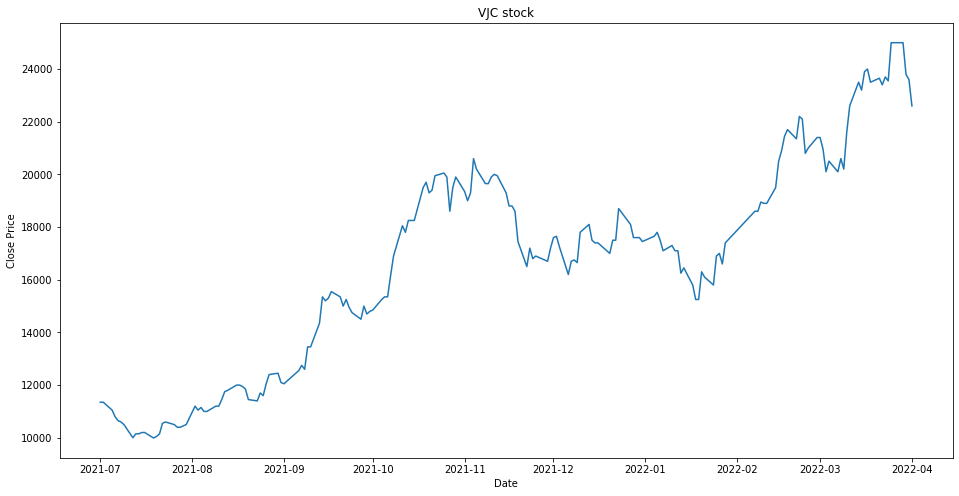

In [ ]:
plt.figure(figsize = (16,8))
plt.title('VJC stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [ ]:
df = df[['Close']]
df.head()

,Close
Date,
2021-07-01,11350
2021-07-02,11350
2021-07-05,11050
2021-07-06,10800
2021-07-07,10650


In [ ]:
future_days = 59
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(150)

<ipython-input-71-0b446e94bf97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


,Close,Prediction
Date,,
2021-07-01,11350,14750.0
2021-07-02,11350,14500.0
2021-07-05,11050,15000.0
2021-07-06,10800,14700.0
2021-07-07,10650,14800.0
...,...,...
2022-01-25,16900,NaN
2022-01-26,17000,NaN
2022-01-27,16600,NaN


In [ ]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
Y = np.array(df['Prediction'])[:-future_days]
print(X.shape[0])
print(Y)

130
[14750. 14500. 15000. 14700. 14800. 14850. 15250. 15350. 15350. 16150.
 16900. 18050. 17800. 18250. 18250. 18250. 19500. 19700. 19300. 19400.
 19950. 20050. 19900. 18600. 19500. 19900. 19350. 19000. 19300. 20600.
 20200. 19650. 19650. 19900. 20000. 19950. 19300. 18800. 18800. 18600.
 17450. 16500. 17200. 16800. 16900. 16850. 16700. 17200. 17600. 17650.
 17250. 16200. 16700. 16750. 16650. 17800. 18100. 17500. 17400. 17400.
 17300. 17000. 17500. 17500. 18700. 18550. 18100. 17600. 17600. 17600.
 17450. 17650. 17800. 17500. 17100. 17300. 17100. 17100. 16250. 16450.
 15800. 15250. 15250. 16300. 16100. 15800. 16900. 17000. 16600. 17400.
 18600. 18600. 18950. 18900. 18900. 19500. 20500. 20900. 21450. 21700.
 21350. 22200. 22100. 20800. 21000. 21400. 21400. 20950. 20100. 20500.
 20100. 20600. 20200. 21600. 22600. 23500. 23200. 23900. 24000. 23500.
 23650. 23400. 23700. 23550. 25000. 25000. 25000. 23800. 23600. 22600.]


<ipython-input-72-242648fb32c6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3122, random_state=0)
model = DecisionTreeRegressor()
model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
X_future = df.drop(['Prediction'], 1)[:-future_days]
print(X_future)
X_future = X_future.tail(future_days)
X_future = np.array(X_future)

            Close
Date             
2021-07-01  11350
2021-07-02  11350
2021-07-05  11050
2021-07-06  10800
2021-07-07  10650
...           ...
2021-12-27  18100
2021-12-28  17600
2021-12-29  17600
2021-12-30  17600
2021-12-31  17450

[130 rows x 1 columns]


<ipython-input-74-929d64723a7f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_future = df.drop(['Prediction'], 1)[:-future_days]


In [ ]:
tree_prediction = model.predict(X_future)
print(tree_prediction)

[20125.  17450.  17450.  17450.  16800.  16800.  17050.  15800.  17675.
 15800.  15675.  18350.  16800.  15675.  15800.  16900.  17050.  16600.
 17400.  16800.  16800.  15675.  17675.  17675.  17050.  23550.  23550.
 18350.  22150.  21350.  21800.  22100.  19200.  22100.  20600.  21800.
 23337.5 20100.  20500.  20100.  20600.  20200.  21600.  20125.  23500.
 23700.  23950.  23950.  23500.  19200.  23700.  23700.  23550.  25000.
 23500.  23337.5 23337.5 23337.5 22150. ]


<ipython-input-76-f70ee9ef225d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


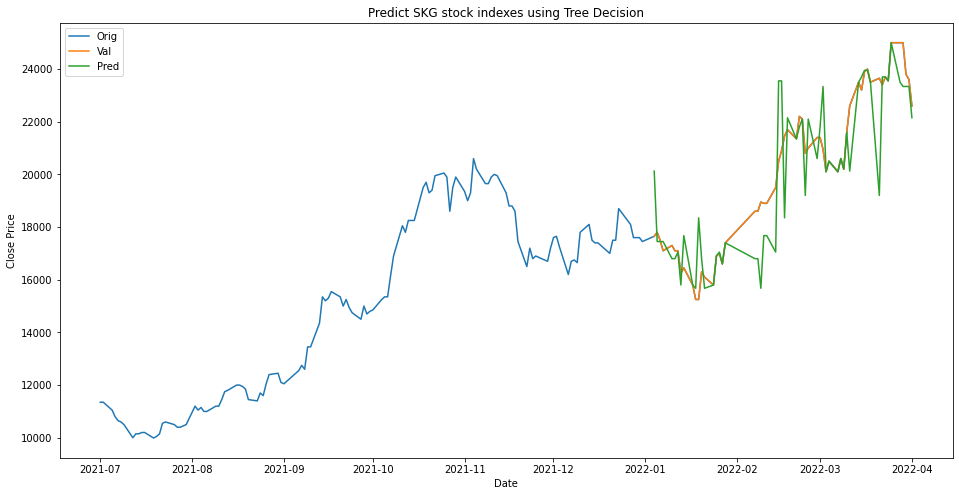

In [ ]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Predict SKG stock indexes using Tree Decision')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [ ]:
from sklearn.metrics import r2_score
Y_test_mean = np.full(len(Y_test), Y_test.mean())
r2_score(Y_test, Y_test_mean)
r2_score(Y_test, Y_test)

1.0

**Mean Absolute Error**

In [ ]:
print(model.score(X_test, Y_test))
Y_future = np.array(df['Close'])[-future_days:] # actual future Y
mae = mean_absolute_error(Y_future, predictions)
print(mae)

0.3794806979497246
849.5762711864406
